---
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Investigación Operativa I4051__\
__Autor: Rodrigo Maranzana__, Rmaranzana@frba.utn.edu.ar

---

# Cálculo de estado estacionario en Cadenas de Markov

Importamos las librerías necesarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as mtrans

Ingresamos los datos de la matriz de transición en una matriz numpy:

In [2]:
## Matriz de transición como numpy array:
T = np.array([[0.0, 0.5, 0.5],
              [0.0, 1.0, 0.0],
              [0.0, 0.0, 1.0]])

# Printeamos T
print(f'Matriz de transición: \n{T}')

Matriz de transición: 
[[0.  0.5 0.5]
 [0.  1.  0. ]
 [0.  0.  1. ]]


## Visualización desde estado inicial

Podemos calcular el estado futuro para distintos saltos de transición.

In [3]:
def calcular_estado_futuro(m, p_0):
    
    # Cálculo de la matriz de transición a tiempo m:
    Tm = np.linalg.matrix_power(T, m)

    # Cálculo de vector de proba de estado a m:
    p_m = np.dot(p_0, Tm)

    return p_m

Hacemos un for loop para distintos m:

Text(0, 0.5, 'Probabilidad')

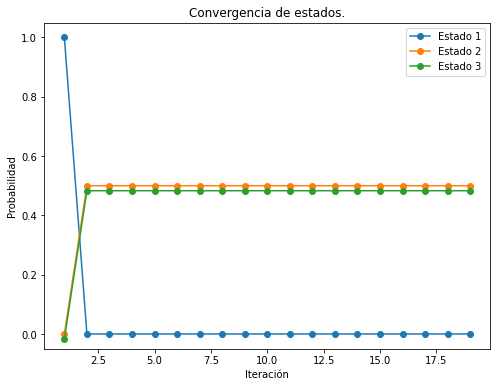

In [19]:
# Cantidad de pasos:
m_tot = 20

# Generación del vector inicial p_0:
p_0 = np.array([1.0, 0.0, 0.0])

# vectores para guardar estados:
estado_a = [p_0[0]]
estado_b = [p_0[1]]
estado_c = [p_0[2]]

# For loop:
for m in range(2, m_tot):
    
    p_m = calcular_estado_futuro(m, p_0)
    
    # guardamos estados:
    estado_a.append(p_m[0])
    estado_b.append(p_m[1])
    estado_c.append(p_m[2])
    
# Plotteamos estados:
fig, ax = plt.subplots(figsize=(8, 6))
tr = mtrans.offset_copy(ax.transData, fig=fig, x=0.0, y=-5, units='points')
ax.plot(range(1, m_tot), estado_a, marker='o', label='Estado 1')
ax.plot(range(1, m_tot), estado_b, marker='o', label='Estado 2')
ax.plot(range(1, m_tot), estado_c, marker='o', label='Estado 3', transform=tr)
ax.set_title('Convergencia de estados.')
plt.legend()
ax.set_xlabel('Iteración')
ax.set_ylabel('Probabilidad')

## Visualización estado estacionario desde matriz de transición

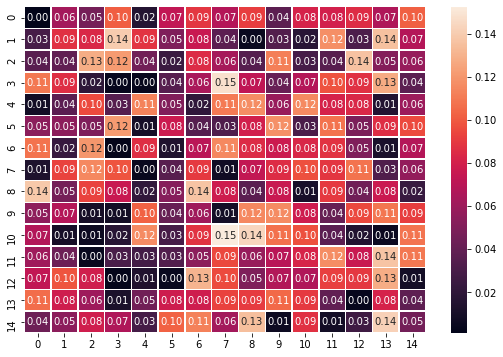

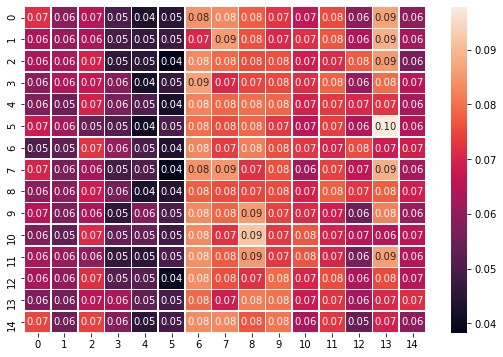

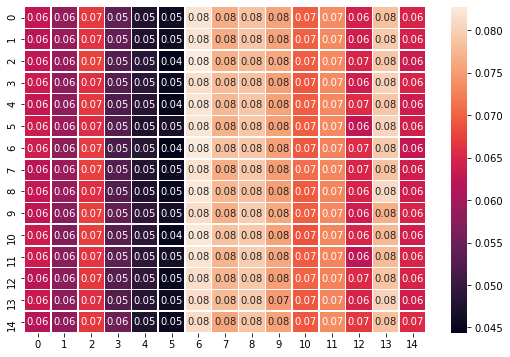

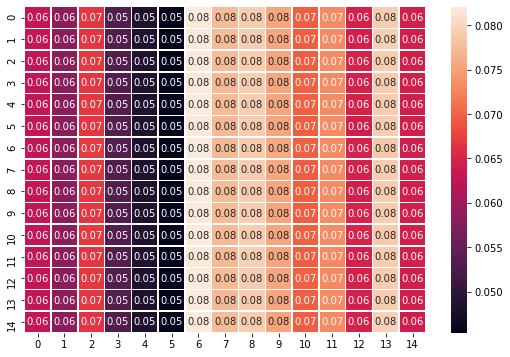

In [78]:
## Matriz de transición como numpy array:
x_size = 15
T_ergo = np.random.rand(x_size, x_size)
T_ergo = np.divide(T_ergo, T_ergo.sum(axis=1).reshape(x_size,-1))
it = 5


for i in range(1, it, 1):
    T_power = np.linalg.matrix_power(T_ergo, i)
    
    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(T_power, annot=True, linewidths=.5, ax=ax, fmt='.2f')
    plt.show()

## Cálculo de estado estacionario con Fuerza Bruta

In [2]:
# Matriz de transición.
# T_st = np.array(
#     [[0.10, 0.90],
#      [0.75, 0.25]]
# )

T_st = np.array(
    [[0.45, 0.55],
     [0.35, 0.65]]
)


# Estado inicial.
p_i = [0.5, 0.5]

In [3]:
# inicializamos:
tol = 10e-4
norma = 999
contador = 1


# mientras el error sea mayor a la tolerancia:
while norma > tol:
    
    # calculamos el estado siguiente:
    p_imas1 = np.dot(p_i, T_st)
    
    # calculamos la diferencia entre estados:
    dif = p_imas1 - p_i
    
    # calculamos la norma del error:
    norma = np.linalg.norm(dif)
    
    # actualizamos p_i y el contador de estados
    p_i = p_imas1
    
    # Aumentamos contador.
    contador += 1
    
print(f'Estado estacionario: {p_i} alcanzado en {contador} iteraciones')

Estado estacionario: [0.3889 0.6111] alcanzado en 5 iteraciones


In [4]:
p_0 = np.zeros(T_ergo.shape[0])

NameError: name 'T_ergo' is not defined

## Cálculo de estado estacionario con Perron-Frobenius

1) Calculamos autovalores y autovectores de la matriz de transición transpuesta.

2) Buscamos el autovalor de magnitud 1.

3) Buscamos el autovector correspondiente a ese autovalor.

4) Normalizamos el autovector.

In [5]:
# Búsqueda de autovalores (w) y autovectores (v)
w, v = np.linalg.eig(T_st.T)

In [6]:
# Visualizamos autovalores.
w

array([0.1, 1. ])

In [7]:
# Visualizamos autovectores.
v

array([[-0.70710678, -0.53687549],
       [ 0.70710678, -0.84366149]])

In [30]:
# El autovector de interés está en la columna de los autovectores correspondiente al autovalor 1.
v_steady = v[:, 1]

v_steady

array([-0.6401844 , -0.76822128])

In [31]:
# Normalizamos
steady_state = v_steady / np.sum(v_steady)

print(f'Estado estacionario: {steady_state}')

Estado estacionario: [0.45454545 0.54545455]


## Spectral gap

In [8]:
order_eig = np.sort(w)
eig1 = order_eig[-1]
eig2 = order_eig[-2]

sg = eig1 - eig2

print(f'Spectral Gap: {sg}')

Spectral Gap: 0.9


In [20]:
# Matriz de transición.
# T_st = np.array(
#     [[0.10, 0.90],
#      [0.75, 0.25]]
# )

T_st = np.array(
    [[0.45, 0.55],
     [0.35, 0.65]]
)

# Búsqueda de autovalores (w) y autovectores (v)
w, v = np.linalg.eig(T_st.T)

def calcular_estado_futuro(m, p_0):

    # Cálculo de la matriz de transición a tiempo m:
    Tm = np.linalg.matrix_power(T_st, m)

    # Cálculo de vector de proba de estado a m:
    p_m = np.dot(p_0, Tm)

    return p_m


# Cantidad de pasos:
m_tot = 20

# Generación del vector inicial p_0:
p_0 = np.array([0.5, 0.5])

# vectores para guardar estados:
estado_ab = [p_0[0]]
estado_bb = [p_0[1]]

# For loop:
for m in range(2, m_tot):

    p_m = calcular_estado_futuro(m, p_0)

    # guardamos estados:
    estado_ab.append(p_m[0])
    estado_bb.append(p_m[1])
    


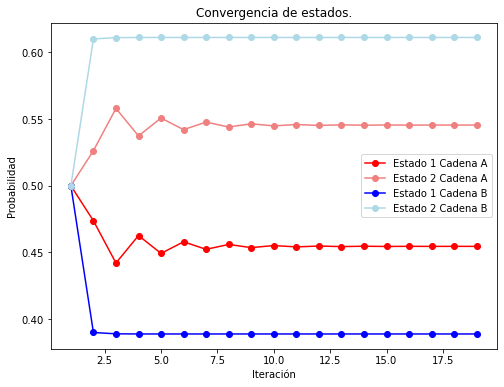

In [24]:
# Plotteamos estados:
plt.subplots(figsize=(8, 6))
plt.plot(range(1, m_tot), estado_aa, marker='o', label='Estado 1 Cadena A', color='r')
plt.plot(range(1, m_tot), estado_ba, marker='o', label='Estado 2 Cadena A', color='lightcoral')
plt.plot(range(1, m_tot), estado_ab, marker='o', label='Estado 1 Cadena B', color='b')
plt.plot(range(1, m_tot), estado_bb, marker='o', label='Estado 2 Cadena B', color='lightblue')
plt.title('Convergencia de estados.')
plt.legend()
plt.xlabel('Iteración')
plt.ylabel('Probabilidad')

plt.show()